In [30]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [35]:
# Function to take photo
def takePhoto():
  camera = cv2.VideoCapture(0)
  if not camera.isOpened():
    return False

  status, image = camera.read()

  if status == False:
    camera.release()
    return False

  image = cv2.resize(image, (256,256))
  plt.imshow()
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

def getImage():
    dataSet = os.listdir("Data Set")
    #print(len(dataSet))
    category = dataSet[random.randint(0,len(dataSet)-1)]
    images = os.listdir(os.path.join("Data Set/"+category))
    return "Data Set/"+category+"/"+images[random.randint(0,len(images))]

In [12]:
model = tf.keras.models.load_model("./model.keras")

AxesImage(shape=(215, 214, 3))
1/1 [==============================] - 0s 52ms/step
[[0. 0. 0. 1. 0. 0.]]
Bottle  : Rs. 150


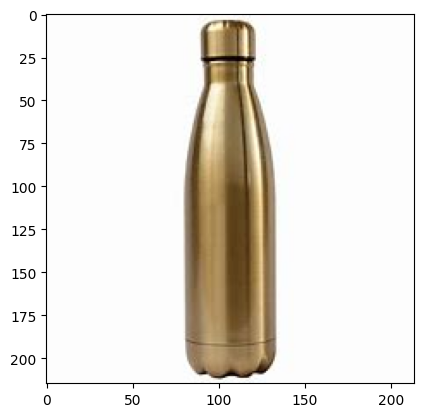

In [43]:
#print(getImage())
inputImage = cv2.cvtColor(cv2.imread(getImage()),cv2.COLOR_BGR2RGB)
di = {0 : ("Apple",25), 1 : ("Banana",10), 2 : ("Book",75), 3 : ("Bottle",150), 
      4: ("Horlicks",80), 5: ("Pen",5)}

x = 0
image = cv2.resize(inputImage, (256,256)).reshape(1,256,256,3)
print(plt.imshow(inputImage))
res  = model.predict(image, batch_size=1)
maxIndex = 0
print(res)
for i in range(len(res[0])):
  if res[0][i]>res[0][maxIndex]:
    maxIndex = i


print(di[maxIndex][0]," : Rs.",di[maxIndex][1])